In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
robustness = pd.read_csv('./results/robustness.csv')
efficiency = pd.read_csv('./results/efficiency.csv')

In [3]:
robustness.head(20)

,algorithm,numberOfRightAngleTurns,visitExcess,path,duration,pathSize,start,end,barrierID,roundID
0,magnetic,11,0,0::0:::0::1:::0::2:::0::3:::0::4:::0::5:::0::6...,0.002408,101,0::0,49::49,3vhrLQTpuGrZr4mqeiZ9IA,100
1,astar,4,82,0::0:::0::1:::1::1:::2::1:::3::1:::4::1:::5::1...,0.029645,99,0::0,49::49,3vhrLQTpuGrZr4mqeiZ9IA,100
2,lee,91,0,0::0:::0::1:::1::1:::1::2:::2::2:::3::2:::4::2...,0.001336,99,0::0,49::49,3vhrLQTpuGrZr4mqeiZ9IA,100
3,magnetic,35,0,0::0:::1::0:::2::0:::3::0:::4::0:::5::0:::6::0...,0.002092,115,0::0,49::49,N8YOL8MuLJ14-r7U8Rzs_Q,99
4,astar,1,92,0::0:::1::0:::2::0:::3::0:::4::0:::5::0:::6::0...,0.030187,99,0::0,49::49,N8YOL8MuLJ14-r7U8Rzs_Q,99
5,lee,83,0,0::0:::0::1:::1::1:::2::1:::2::2:::2::3:::2::4...,0.001322,99,0::0,49::49,N8YOL8MuLJ14-r7U8Rzs_Q,99
6,magnetic,28,0,0::0:::1.0::0:::2.0::0:::2.0::1.0:::2.0::2.0::...,0.002053,109,0::0,49::49,tQMSr9G1azzCastWi6KtXA,98
7,astar,15,88,0::0:::1::0:::2::0:::3::0:::4::0:::5::0:::6::0...,0.031674,103,0::0,49::49,tQMSr9G1azzCastWi6KtXA,98
8,lee,91,0,0::0:::0::1:::1::1:::1::2:::2::2:::2::3:::3::3...,0.001329,99,0::0,49::49,tQMSr9G1azzCastWi6KtXA,98
9,magnetic,33,0,0::0:::1::0:::2::0:::3::0:::4::0:::5::0:::6::0...,0.002577,111,0::0,49::49,uldM52rILp-zj7eT5ZBoUA,97


In [4]:
def extractWinners (dataset=robustness, metric='pathSize'):
    roundsData = {}
    
    def addToRoundsData (row):
        id_ = row.roundID
        if not (id_ in roundsData):
            roundsData[id_] = {'best':float('inf'), 'by':None}
        
#         if row.algorithm == 'astar':
#             return
        
        if row[metric] < roundsData[id_]['best']:
            roundsData[id_] =  {'best':row[metric], 'by':row.algorithm}

    def getFrequency ():
        count_ = {}
        for r in roundsData:
            winner = roundsData[r]['by']
            if not (winner in count_):
                count_[winner] = 0
            count_[winner] += 1
        return count_

    dataset.apply(lambda row: addToRoundsData(row), axis=1)
    return getFrequency()

In [5]:
def plotResults (data):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = list(data)
    students = [ data[x] for x in langs ]
    ax.bar(langs,students, width=0.25)
    plt.show()

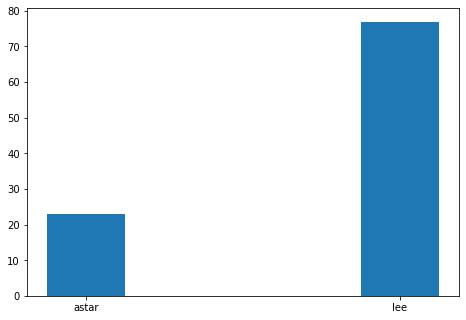

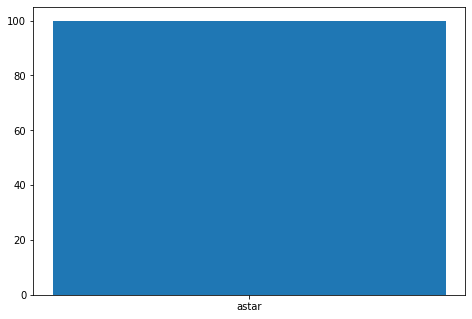

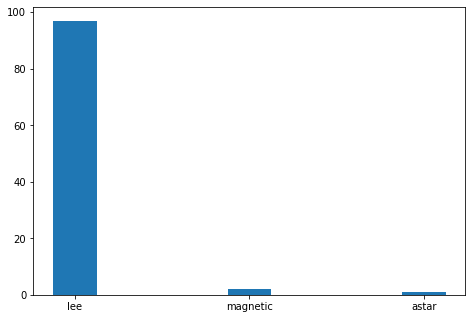

In [6]:
winners = extractWinners(robustness,metric='pathSize')
winnersAngles = extractWinners(robustness,metric='numberOfRightAngleTurns')
winnersDuration = extractWinners(robustness,metric='duration')
plotResults(winners)
plotResults(winnersAngles)
plotResults(winnersDuration)